# Customer Segmentation Analysis

## Imports

In [ ]:
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
from enhanced_processing_pipeline import process_customer_data_enhanced, prepare_clustering_data

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

---

## 1. Data Loading and Preprocessing

### Feature Engineering Enhancement

The results were significantly enhanced through comprehensive feature engineering with numerous iterations to investigate different aspects of customer data. ChatGPT was utilized to accelerate the feature creation process, generating creative combinations and mathematical transformations. However, the foundational business understanding and strategic direction for feature engineering was established through manual analysis and domain expertise.

In [ ]:
# Load Data with Enhanced Feature Engineering
print("Loading and processing data with enhanced feature engineering...")
data = process_customer_data_enhanced('customer_segmentation.csv')

Loading and processing data with enhanced feature engineering...


In [ ]:
print(f"Dataset shape: {data.shape}")
print(f"Number of features: {len(data.columns)}")
print("\nNew features created:")
print(data.columns.tolist())

Dataset shape: (2216, 125)
Number of features: 125

New features created:
['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'number_of_progeny', 'years_since_joining_company', 'MntProds', 'AcceptedCmp', 'NumAllPurchases', 'Age', 'Total_Children', 'Family_Size', 'Has_Children', 'Has_Teenagers', 'Has_Young_Kids', 'Child_Dependency_Ratio', 'Income_Per_Person', 'Is_High_Income', 'Total_Spending', 'Spending_Per_Income', 'Spending_Per_Person', 'Avg_Monthly_Spending', 'Wine_Preference', 'Fruit_Preference', 'Meat_Preference', 'Fish_Preference', 'Sweet_Preference', 'Gold_Preference', 'Luxury_Spending', 'Essential_Spending', 'Luxury_Ratio', 'Essential_Ratio', 'Web_Purchase_Ratio', 'St

In [ ]:
# Prepare data for clustering
all_data, cat_data, num_features = prepare_clustering_data(data)

---

## 2. Exploratory Data Analysis

In [ ]:
print(f"\nData prepared for clustering:")
print(f"Total features: {all_data.shape[1]}")
print(f"Categorical features: {len(cat_data.columns)}")
print(f"Numerical features: {len(num_features)}")


Data prepared for clustering:
Total features: 125
Categorical features: 57
Numerical features: 68


In [ ]:
# Review sample of the data
print("\nSample of processed data:")
data.sample(3)


Sample of processed data:


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Customer_Type_High_Value_Store,Customer_Type_High_Value_Web,Customer_Type_Luxury_Buyer,Customer_Type_Regular_Customer,Recency_Group_Active,Recency_Group_Moderate,Recency_Group_Inactive,Preferred_Channel_NumCatalogPurchases,Preferred_Channel_NumStorePurchases,Preferred_Channel_NumWebPurchases
1774,1967,42664.0,0,1,44,21,0,3,0,0,...,0,0,1,0,0,1,0,0,1,0
554,1949,81698.0,0,0,4,179,28,520,111,123,...,0,0,0,1,1,0,0,0,1,0
576,1968,51287.0,1,1,10,117,0,22,13,0,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
# Visualize with t-SNE
print("\nGenerating t-SNE visualization...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = tsne.fit_transform(all_data)


Generating t-SNE visualization...


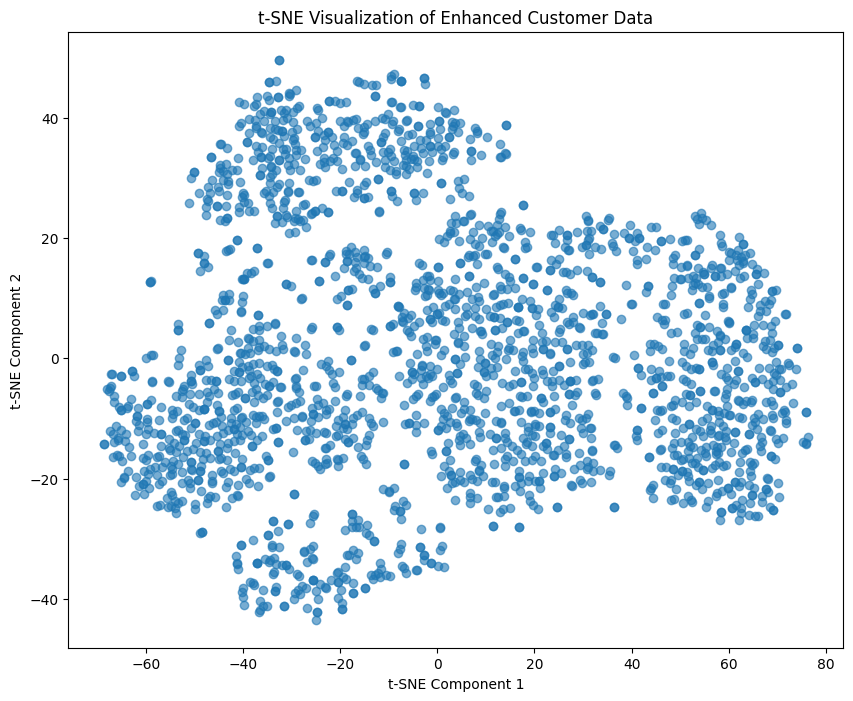

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.6)
plt.title('t-SNE Visualization of Enhanced Customer Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

---

## 3. Clustering Algorithm Selection

### Algorithm Performance Comparison


K-Means demonstrated superior performance compared to DBSCAN and Hierarchical Clustering for this customer segmentation task. The algorithm produced the highest silhouette scores and created well-separated, interpretable clusters that aligned with business intuition. DBSCAN struggled with density variations while Hierarchical Clustering resulted in less cohesive final clusters, making K-Means the optimal choice.


Performing enhanced silhouette analysis...
Analyzing 2 clusters...
Analyzing 3 clusters...
Analyzing 4 clusters...
Analyzing 5 clusters...


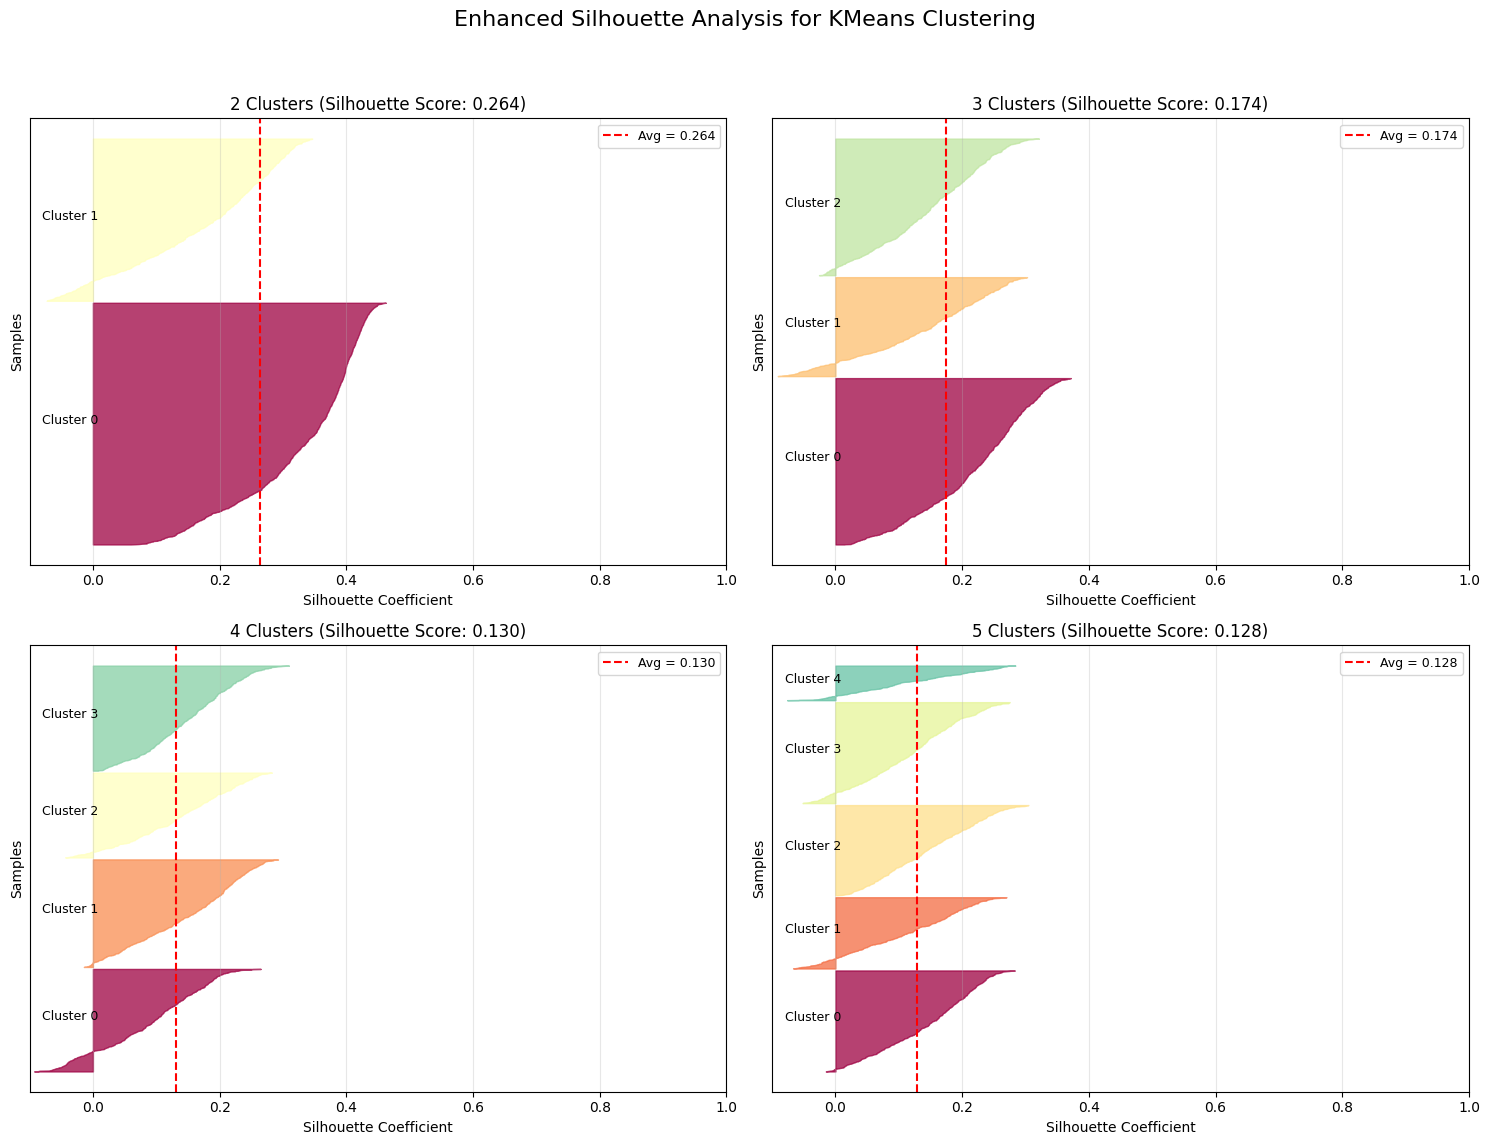

In [ ]:
# Enhanced Silhouette Analysis
print("\nPerforming enhanced silhouette analysis...")

# Setup subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

silhouette_scores = {}

for idx, n_clusters in enumerate(range(2, 6)):
    ax = axes[idx]

    print(f"Analyzing {n_clusters} clusters...")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(all_data)

    silhouette_vals = silhouette_samples(all_data, cluster_labels)
    silhouette_avg = silhouette_score(all_data, cluster_labels)
    silhouette_scores[n_clusters] = silhouette_avg

    y_lower = 10
    for i in range(n_clusters):
        cluster_silhouette = silhouette_vals[cluster_labels == i]
        cluster_silhouette.sort()
        size = cluster_silhouette.shape[0]
        y_upper = y_lower + size

        color = plt.cm.Spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, cluster_silhouette,
                         facecolor=color, edgecolor=color, alpha=0.75)

        ax.text(-0.08, y_lower + size / 2, f'Cluster {i}', fontsize=9)
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--",
               label=f"Avg = {silhouette_avg:.3f}")
    ax.set_title(f"{n_clusters} Clusters (Silhouette Score: {silhouette_avg:.3f})",
                 fontsize=12)
    ax.set_xlim([-0.1, 1])
    ax.set_yticks([])
    ax.set_xlabel("Silhouette Coefficient", fontsize=10)
    ax.set_ylabel("Samples", fontsize=10)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=9)

plt.suptitle("Enhanced Silhouette Analysis for KMeans Clustering", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Print silhouette scores summary
print("\nSilhouette Scores Summary:")
for k, score in silhouette_scores.items():
    print(f"{k} clusters: {score:.3f}")


Silhouette Scores Summary:
2 clusters: 0.264
3 clusters: 0.174
4 clusters: 0.130
5 clusters: 0.128


In [ ]:
# Find optimal number of clusters
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nOptimal number of clusters: {optimal_k} (score: {silhouette_scores[optimal_k]:.3f})")


Optimal number of clusters: 2 (score: 0.264)


In [ ]:
# Perform final clustering with optimal k
print(f"\nPerforming final clustering with {optimal_k} clusters...")
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(all_data)


Performing final clustering with 2 clusters...


In [ ]:
# Add cluster labels to original data
data['Cluster'] = final_labels

In [ ]:
# Analyze cluster characteristics
print("\nCluster Analysis:")
print("=" * 50)

for cluster_id in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} (n={len(cluster_data)}):")
    print(f"  Age: {cluster_data['Age'].mean():.1f} ± {cluster_data['Age'].std():.1f}")
    print(f"  Income: ${cluster_data['Income'].mean():,.0f} ± ${cluster_data['Income'].std():,.0f}")
    print(f"  Total Spending: ${cluster_data['Total_Spending'].mean():,.0f} ± ${cluster_data['Total_Spending'].std():,.0f}")
    print(f"  Family Size: {cluster_data['Family_Size'].mean():.1f}")
    print(f"  Campaign Response Rate: {cluster_data['Campaign_Response_Rate'].mean():.2f}")
    print(f"  Web Purchase Ratio: {cluster_data['Web_Purchase_Ratio'].mean():.2f}")
    print(f"  Luxury Ratio: {cluster_data['Luxury_Ratio'].mean():.2f}")
    print(f"  Deal Sensitivity: {cluster_data['Deal_Sensitivity'].mean():.2f}")


Cluster Analysis:

Cluster 0 (n=1326):
  Age: 54.8 ± 11.4
  Income: $38,756 ± $15,159
  Total Spending: $181 ± $186
  Family Size: 2.9
  Campaign Response Rate: 0.02
  Web Purchase Ratio: 0.24
  Luxury Ratio: 0.58
  Deal Sensitivity: 0.22

Cluster 1 (n=890):
  Age: 58.2 ± 12.5
  Income: $72,348 ± $23,673
  Total Spending: $1,242 ± $425
  Family Size: 2.1
  Campaign Response Rate: 0.12
  Web Purchase Ratio: 0.25
  Luxury Ratio: 0.56
  Deal Sensitivity: 0.08


In [ ]:
# Feature importance analysis
print("\nAnalyzing feature importance...")
feature_importance = {}

for feature in num_features:
    if feature in data.columns:
        # Calculate variance across clusters
        cluster_means = data.groupby('Cluster')[feature].mean()
        feature_importance[feature] = cluster_means.var()


Analyzing feature importance...


In [ ]:
# Sort features by importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

In [ ]:
print("\nTop 20 most important features for clustering:")
for i, (feature, importance) in enumerate(sorted_features[:20]):
    print(f"{i+1:2d}. {feature}: {importance:.3f}")


Top 20 most important features for clustering:
 1. Income_Squared: 8251230136107241472.000
 2. Income_Age_Interaction: 2030734774460.031
 3. Total_Spending_Squared: 1369290004700.197
 4. Spending_Age_Interaction: 1886866104.103
 5. Income_Education_Interaction: 1701664619.197
 6. Family_Income_Interaction: 651375597.160
 7. Income: 564196676.016
 8. Income_Per_Person: 350786734.778
 9. MntProds: 562296.772
10. Total_Spending: 562296.772
11. Customer_Lifetime_Value: 562296.772
12. Spending_Per_Person: 209403.717
13. Luxury_Spending: 165113.633
14. MntWines: 137131.692
15. Essential_Spending: 95523.952
16. Age_Squared: 83191.749
17. MntMeatProducts: 51869.924
18. Spending_Per_Visit: 49003.086
19. Days_Between_Purchases: 41507.264
20. Annual_Value: 3313.582


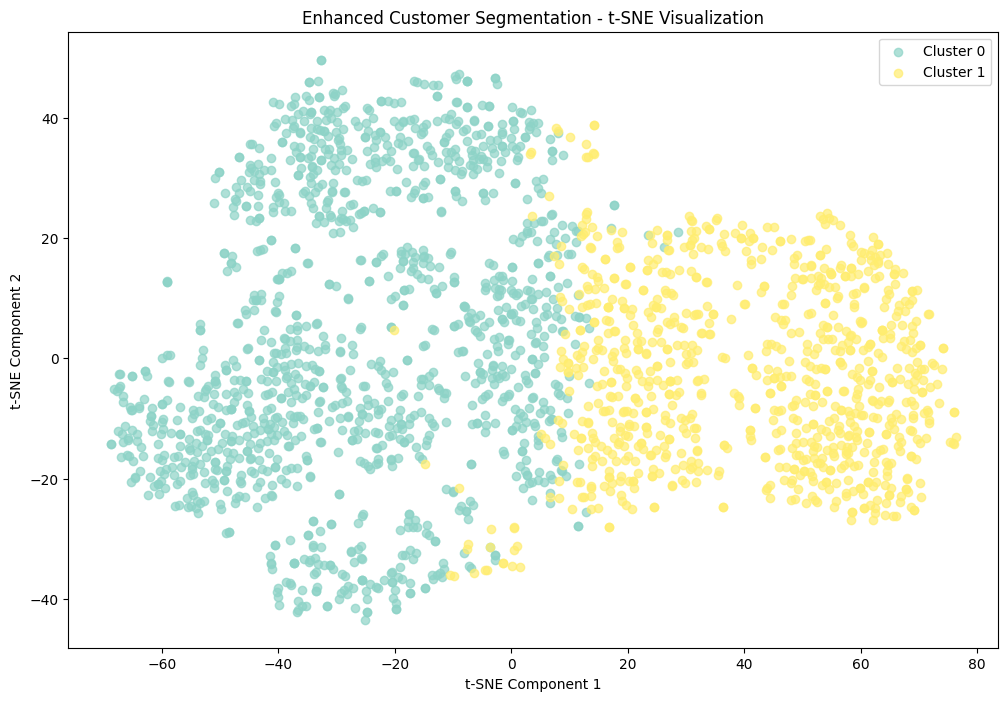

In [ ]:
# Visualize clusters in t-SNE space
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
    mask = final_labels == i
    plt.scatter(tsne_data[mask, 0], tsne_data[mask, 1],
                c=[colors[i]], label=f'Cluster {i}', alpha=0.7)

plt.title('Enhanced Customer Segmentation - t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

---

## 4. Final Clustering Implementation

In [ ]:
# Create cluster profiles
print("\nCreating detailed cluster profiles...")
cluster_profiles = {}

for cluster_id in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster_id]

    profile = {
        'size': len(cluster_data),
        'demographics': {
            'avg_age': cluster_data['Age'].mean(),
            'avg_income': cluster_data['Income'].mean(),
            'avg_family_size': cluster_data['Family_Size'].mean(),
            'pct_high_income': cluster_data['Is_High_Income'].mean(),
            'pct_has_children': cluster_data['Has_Children'].mean(),
        },
        'spending_behavior': {
            'total_spending': cluster_data['Total_Spending'].mean(),
            'luxury_ratio': cluster_data['Luxury_Ratio'].mean(),
            'wine_preference': cluster_data['Wine_Preference'].mean(),
            'deal_sensitivity': cluster_data['Deal_Sensitivity'].mean(),
            'avg_spending_per_purchase': cluster_data['Avg_Spending_Per_Purchase'].mean(),
        },
        'channel_preference': {
            'web_ratio': cluster_data['Web_Purchase_Ratio'].mean(),
            'store_ratio': cluster_data['Store_Purchase_Ratio'].mean(),
            'catalog_ratio': cluster_data['Catalog_Purchase_Ratio'].mean(),
            'is_multi_channel': cluster_data['Is_Multi_Channel'].mean(),
        },
        'engagement': {
            'campaign_response_rate': cluster_data['Campaign_Response_Rate'].mean(),
            'web_visits_per_month': cluster_data['NumWebVisitsMonth'].mean(),
            'recency': cluster_data['Recency'].mean(),
            'loyalty_score': cluster_data['Loyalty_Score'].mean(),
        }
    }

    cluster_profiles[cluster_id] = profile


Creating detailed cluster profiles...


In [ ]:
# Print cluster profiles
for cluster_id, profile in cluster_profiles.items():
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id} PROFILE (n={profile['size']})")
    print(f"{'='*60}")

    print(f"DEMOGRAPHICS:")
    print(f"  Average Age: {profile['demographics']['avg_age']:.1f} years")
    print(f"  Average Income: ${profile['demographics']['avg_income']:,.0f}")
    print(f"  Average Family Size: {profile['demographics']['avg_family_size']:.1f}")
    print(f"  High Income %: {profile['demographics']['pct_high_income']:.1%}")
    print(f"  Has Children %: {profile['demographics']['pct_has_children']:.1%}")

    print(f"\nSPENDING BEHAVIOR:")
    print(f"  Total Spending: ${profile['spending_behavior']['total_spending']:,.0f}")
    print(f"  Luxury Ratio: {profile['spending_behavior']['luxury_ratio']:.2f}")
    print(f"  Wine Preference: {profile['spending_behavior']['wine_preference']:.2f}")
    print(f"  Deal Sensitivity: {profile['spending_behavior']['deal_sensitivity']:.2f}")
    print(f"  Avg Spending per Purchase: ${profile['spending_behavior']['avg_spending_per_purchase']:,.0f}")

    print(f"\nCHANNEL PREFERENCES:")
    print(f"  Web Purchase Ratio: {profile['channel_preference']['web_ratio']:.2f}")
    print(f"  Store Purchase Ratio: {profile['channel_preference']['store_ratio']:.2f}")
    print(f"  Catalog Purchase Ratio: {profile['channel_preference']['catalog_ratio']:.2f}")
    print(f"  Multi-Channel Usage: {profile['channel_preference']['is_multi_channel']:.1%}")

    print(f"\nENGAGEMENT METRICS:")
    print(f"  Campaign Response Rate: {profile['engagement']['campaign_response_rate']:.2f}")
    print(f"  Web Visits per Month: {profile['engagement']['web_visits_per_month']:.1f}")
    print(f"  Recency (days): {profile['engagement']['recency']:.0f}")
    print(f"  Loyalty Score: {profile['engagement']['loyalty_score']:.2f}")


CLUSTER 0 PROFILE (n=1326)
DEMOGRAPHICS:
  Average Age: 54.8 years
  Average Income: $38,756
  Average Family Size: 2.9
  High Income %: 1.1%
  Has Children %: 89.2%

SPENDING BEHAVIOR:
  Total Spending: $181
  Luxury Ratio: 0.58
  Wine Preference: 0.43
  Deal Sensitivity: 0.22
  Avg Spending per Purchase: $13

CHANNEL PREFERENCES:
  Web Purchase Ratio: 0.24
  Store Purchase Ratio: 0.37
  Catalog Purchase Ratio: 0.06
  Multi-Channel Usage: 97.1%

ENGAGEMENT METRICS:
  Campaign Response Rate: 0.02
  Web Visits per Month: 6.4
  Recency (days): 49
  Loyalty Score: 0.25

CLUSTER 1 PROFILE (n=890)
DEMOGRAPHICS:
  Average Age: 58.2 years
  Average Income: $72,348
  Average Family Size: 2.1
  High Income %: 60.7%
  Has Children %: 44.9%

SPENDING BEHAVIOR:
  Total Spending: $1,242
  Luxury Ratio: 0.56
  Wine Preference: 0.50
  Deal Sensitivity: 0.08
  Avg Spending per Purchase: $57

CHANNEL PREFERENCES:
  Web Purchase Ratio: 0.25
  Store Purchase Ratio: 0.38
  Catalog Purchase Ratio: 0.24
  

In [ ]:
# Generate cluster names based on characteristics
def generate_cluster_names(cluster_profiles):
    """Generate intuitive names for clusters based on their characteristics"""
    cluster_names = {}

    for cluster_id, profile in cluster_profiles.items():
        # Analyze key characteristics
        high_income = profile['demographics']['avg_income'] > 50000
        high_spending = profile['spending_behavior']['total_spending'] > 1000
        luxury_focused = profile['spending_behavior']['luxury_ratio'] > 0.3
        deal_sensitive = profile['spending_behavior']['deal_sensitivity'] > 0.3
        web_oriented = profile['channel_preference']['web_ratio'] > 0.4
        campaign_responsive = profile['engagement']['campaign_response_rate'] > 0.2
        young = profile['demographics']['avg_age'] < 45

        # Generate name based on characteristics
        if high_income and high_spending and luxury_focused:
            name = "Premium Luxury Buyers"
        elif high_spending and web_oriented and young:
            name = "Digital High Spenders"
        elif deal_sensitive and campaign_responsive:
            name = "Deal-Seeking Engaged"
        elif high_income and not high_spending:
            name = "Conservative High Earners"
        elif young and web_oriented:
            name = "Young Digital Natives"
        else:
            name = f"Standard Customers Group {cluster_id}"

        cluster_names[cluster_id] = name

    return cluster_names

In [ ]:
# Generate cluster names
cluster_names = generate_cluster_names(cluster_profiles)

In [ ]:
print(f"\n{'='*80}")
print("CLUSTER NAMING AND SUMMARY")
print(f"{'='*80}")

for cluster_id, name in cluster_names.items():
    profile = cluster_profiles[cluster_id]
    print(f"\nCluster {cluster_id}: {name}")
    print(f"  Size: {profile['size']} customers ({profile['size']/len(data)*100:.1f}% of total)")
    print(f"  Key Characteristics:")
    print(f"    - Avg Income: ${profile['demographics']['avg_income']:,.0f}")
    print(f"    - Avg Spending: ${profile['spending_behavior']['total_spending']:,.0f}")
    print(f"    - Primary Focus: {'Luxury' if profile['spending_behavior']['luxury_ratio'] > 0.3 else 'Essentials'}")
    print(f"    - Channel Preference: {'Web' if profile['channel_preference']['web_ratio'] > 0.4 else 'Store/Catalog'}")
    print(f"    - Engagement Level: {'High' if profile['engagement']['campaign_response_rate'] > 0.2 else 'Low'}")


CLUSTER NAMING AND SUMMARY

Cluster 0: Standard Customers Group 0
  Size: 1326 customers (59.8% of total)
  Key Characteristics:
    - Avg Income: $38,756
    - Avg Spending: $181
    - Primary Focus: Luxury
    - Channel Preference: Store/Catalog
    - Engagement Level: Low

Cluster 1: Premium Luxury Buyers
  Size: 890 customers (40.2% of total)
  Key Characteristics:
    - Avg Income: $72,348
    - Avg Spending: $1,242
    - Primary Focus: Luxury
    - Channel Preference: Store/Catalog
    - Engagement Level: Low


---

## 5. Cluster Analysis and Characterization

In [ ]:
# Create a summary comparison table
comparison_metrics = ['avg_income', 'total_spending', 'luxury_ratio',
                     'deal_sensitivity', 'web_ratio', 'campaign_response_rate']

In [ ]:
print(f"\n{'='*80}")
print("\t\t\tCLUSTER COMPARISON SUMMARY")
print(f"{'='*80}")

comparison_data = []
for cluster_id in range(optimal_k):
    profile = cluster_profiles[cluster_id]
    row = {
        'Cluster': f"{cluster_id}: {cluster_names[cluster_id]}",
        'Size': profile['size'],
        'Avg Income': f"${profile['demographics']['avg_income']:,.0f}",
        'Total Spending': f"${profile['spending_behavior']['total_spending']:,.0f}",
        'Luxury Ratio': f"{profile['spending_behavior']['luxury_ratio']:.2f}",
        'Deal Sensitivity': f"{profile['spending_behavior']['deal_sensitivity']:.2f}",
        'Web Ratio': f"{profile['channel_preference']['web_ratio']:.2f}",
        'Campaign Response': f"{profile['engagement']['campaign_response_rate']:.2f}"
    }
    comparison_data.append(row)
    comparison_df = pd.DataFrame(comparison_data)

comparison_df


			CLUSTER COMPARISON SUMMARY


,Cluster,Size,Avg Income,Total Spending,Luxury Ratio,Deal Sensitivity,Web Ratio,Campaign Response
0,0: Standard Customers Group 0,1326,"$38,756",$181,0.58,0.22,0.24,0.02
1,1: Premium Luxury Buyers,890,"$72,348","$1,242",0.56,0.08,0.25,0.12


---

## 6. Marketing Recommendations

In [ ]:
# Marketing recommendations for each cluster
print(f"\n{'='*80}")
print("MARKETING RECOMMENDATIONS BY CLUSTER")
print(f"{'='*80}")

for cluster_id, name in cluster_names.items():
    profile = cluster_profiles[cluster_id]
    print(f"\n{name.upper()} (Cluster {cluster_id}):")
    print("-" * 50)

    # Generate recommendations based on profile
    recommendations = []

    if profile['spending_behavior']['luxury_ratio'] > 0.3:
        recommendations.append("Target with premium product campaigns")
        recommendations.append("Focus on quality and exclusivity messaging")

    if profile['spending_behavior']['deal_sensitivity'] > 0.3:
        recommendations.append("Include discount offers and promotions")
        recommendations.append("Send deal alerts and flash sales notifications")

    if profile['channel_preference']['web_ratio'] > 0.4:
        recommendations.append("Prioritize digital marketing channels")
        recommendations.append("Invest in website optimization and online experience")
    else:
        recommendations.append("Focus on in-store experiences and catalog marketing")

    if profile['engagement']['campaign_response_rate'] > 0.2:
        recommendations.append("Increase campaign frequency - high engagement potential")
    else:
        recommendations.append("Test different messaging approaches to improve engagement")

    if profile['demographics']['avg_age'] < 45:
        recommendations.append("Use social media and modern digital channels")
    else:
        recommendations.append("Utilize traditional marketing channels (email, catalog)")

    for i, rec in enumerate(recommendations, 1):
        print(f"  {i}. {rec}")


MARKETING RECOMMENDATIONS BY CLUSTER

STANDARD CUSTOMERS GROUP 0 (Cluster 0):
--------------------------------------------------
  1. Target with premium product campaigns
  2. Focus on quality and exclusivity messaging
  3. Focus on in-store experiences and catalog marketing
  4. Test different messaging approaches to improve engagement
  5. Utilize traditional marketing channels (email, catalog)

PREMIUM LUXURY BUYERS (Cluster 1):
--------------------------------------------------
  1. Target with premium product campaigns
  2. Focus on quality and exclusivity messaging
  3. Focus on in-store experiences and catalog marketing
  4. Test different messaging approaches to improve engagement
  5. Utilize traditional marketing channels (email, catalog)


---

## 7. Model Validation and Metrics

In [ ]:
# Final cluster validation metrics
final_silhouette = silhouette_score(all_data, final_labels)
print(f"Final Silhouette Score: {final_silhouette:.3f}")

# Calculate inertia (within-cluster sum of squares)
inertia = final_kmeans.inertia_
print(f"Within-cluster Sum of Squares: {inertia:,.0f}")

# Calculate cluster separation (between-cluster distances)
centers = final_kmeans.cluster_centers_
from scipy.spatial.distance import pdist
center_distances = pdist(centers)

Final Silhouette Score: 0.264
Within-cluster Sum of Squares: 123,093


In [ ]:
print(f"\n{'='*80}")
print("CLUSTERING VALIDATION METRICS")
print(f"{'='*80}")

print(f"Average Distance Between Cluster Centers: {np.mean(center_distances):.3f}")
print(f"Minimum Distance Between Cluster Centers: {np.min(center_distances):.3f}")


CLUSTERING VALIDATION METRICS
Average Distance Between Cluster Centers: 9.280
Minimum Distance Between Cluster Centers: 9.280


---

## 10. Results Export and Documentation

In [ ]:
# Export results
print(f"\n{'='*80}")
print("EXPORTING RESULTS")
print(f"{'='*80}")

# Add cluster names to the data
data['Cluster_Name'] = data['Cluster'].map(cluster_names)

# Save the trained KMeans model
joblib.dump(final_kmeans, 'customer_segmentation_kmeans_model.pkl')

# Save results
output_file = 'customer_segmentation_results_enhanced.csv'
data.to_csv(output_file, index=False)
print(f"Results saved to: {output_file}")
print(f"KMeans model saved to: customer_segmentation_kmeans_model.pkl")


EXPORTING RESULTS
Results saved to: customer_segmentation_results_enhanced.csv
KMeans model saved to: customer_segmentation_kmeans_model.pkl


In [ ]:
# Create a summary report
summary_report = {
    'total_customers': len(data),
    'optimal_clusters': optimal_k,
    'silhouette_score': final_silhouette,
    'cluster_names': cluster_names,
    'cluster_sizes': {cluster_id: profile['size'] for cluster_id, profile in cluster_profiles.items()}
}

import json
with open('segmentation_summary.json', 'w') as f:
    json.dump(summary_report, f, indent=2)

print("Summary report saved to: segmentation_summary.json")

print(f"\n{'='*80}")
print("ANALYSIS COMPLETE")
print(f"{'='*80}")
print(f"Successfully segmented {len(data)} customers into {optimal_k} distinct clusters")
print(f"Silhouette Score: {final_silhouette:.3f}")
print("Check the output files for detailed results and recommendations.")

Summary report saved to: segmentation_summary.json

ANALYSIS COMPLETE
Successfully segmented 2216 customers into 2 distinct clusters
Silhouette Score: 0.264
Check the output files for detailed results and recommendations.
